# Linear Regression

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
import torch
import torch.nn as nn

### Univariate

In [135]:
def train_linear_model(X: torch.Tensor, y: torch.Tensor, learning_rate: int ,n_epochs: int):

    n_samples, n_features = X.shape
    n_outputs = y.shape[1]

    model = nn.Linear(n_features, n_outputs)

    criterion = nn.MSELoss()
    optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(n_epochs):
        # Forward pass
        y_pred = model(X)
        l = criterion(y_pred, y)
        losses.append(l.item())

        # Backward pass
        l.backward()

        # Update
        optimiser.step()
        optimiser.zero_grad()

    return model, losses


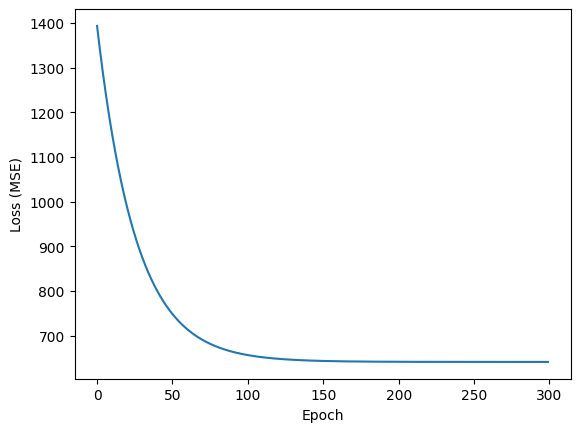

In [136]:
dataset = make_regression(n_samples=300, n_features=1, n_targets=1, noise=25, random_state=42)
X, y = [torch.tensor(data, dtype=torch.float32) for data in dataset]
y = y.reshape(-1, 1)

model, losses = train_linear_model(X, y, 0.01, 300)

# Plot loss over time
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()

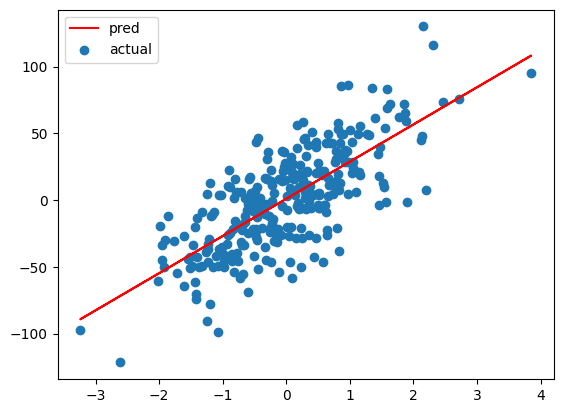

In [137]:
# Final prediction on new data
with torch.no_grad():
    y_hat = model(X)

plt.plot(X, y_hat, 'r-', label="pred")
plt.scatter(X, y, label="actual")
plt.legend(loc="best")

### Multivariate

In [138]:
dataset = make_regression(n_samples=300, n_features=10, n_targets=1, n_informative=3, noise=25, random_state=42)
X, y = [torch.tensor(data, dtype=torch.float32) for data in dataset]
y = y.reshape(-1, 1)

model, losses = train_linear_model(X, y, 0.01, 300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


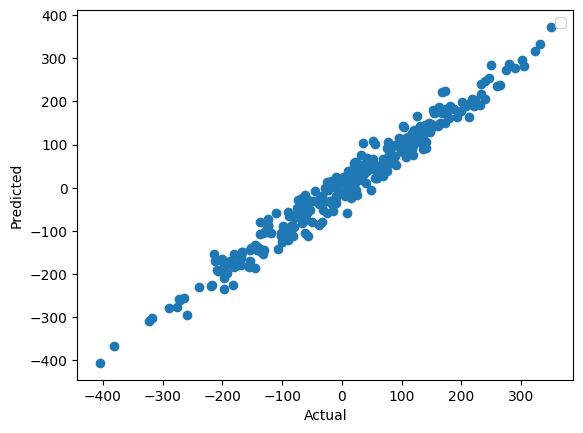

In [152]:
# Final prediction on new data
with torch.no_grad():
    y_hat = model(X)

plt.scatter(y.flatten(), y_hat.flatten())
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(loc="best")

### Multi-target regression

In [154]:
dataset = make_regression(n_samples=300, n_features=10, n_targets=3, n_informative=3, noise=25, random_state=42)
X, y = [torch.tensor(data, dtype=torch.float32) for data in dataset]

model, losses = train_linear_model(X, y, 0.01, 300)

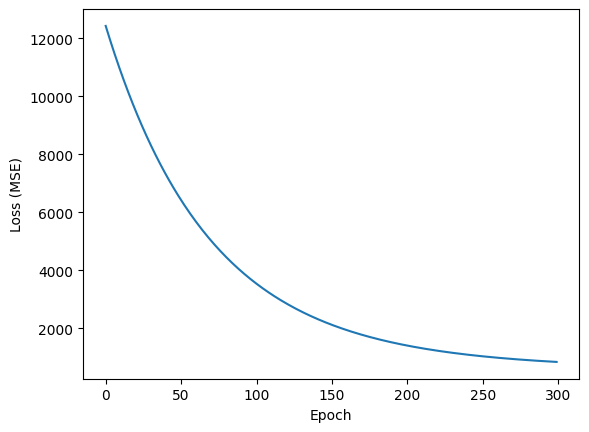

In [158]:
# Final prediction on new data
with torch.no_grad():
    y_hat = model(X)

plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()